In [166]:
# Load necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [141]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df.head(15)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
5,389,convex,grooves,pink,no,spicy,attached,crowded,broad,orange,enlarging,club,smooth,smooth,white,yellow,universal,white,one,sheathing,white,scattered,woods,poisonous,4.337043,16.189338
6,330,bell,smooth,brown,no,anise,free,distant,broad,buff,tapering,missing,scaly,smooth,red,red,partial,white,two,flaring,green,scattered,leaves,poisonous,12.702359,24.662015
7,98,conical,fibrous,white,yes,none,notched,close,narrow,black,tapering,equal,scaly,fibrous,yellow,brown,partial,brown,one,large,orange,several,woods,poisonous,11.963690,19.408506
8,597,conical,grooves,green,yes,pungent,attached,crowded,narrow,buff,tapering,club,silky,smooth,buff,pink,universal,yellow,two,evanescent,chocolate,solitary,woods,edible,14.272490,13.260537
9,16,convex,scaly,brown,yes,almond,attached,crowded,broad,red,tapering,bulbous,silky,scaly,buff,red,partial,white,none,zone,green,clustered,leaves,poisonous,11.842597,4.216489


In [142]:
df = df.drop('Unnamed: 0', axis=1)

In [143]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [144]:
# Total no.of rows and columns
df.shape

(2000, 25)

In [145]:
# List of columns
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [164]:
# Information about all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   int32  
 1   cap_surface               2000 non-null   int32  
 2   cap_color                 2000 non-null   int32  
 3   bruises                   2000 non-null   int32  
 4   odor                      2000 non-null   int32  
 5   gill_attachment           2000 non-null   int32  
 6   gill_spacing              2000 non-null   int32  
 7   gill_size                 2000 non-null   int32  
 8   gill_color                2000 non-null   int32  
 9   stalk_shape               2000 non-null   int32  
 10  stalk_root                2000 non-null   int32  
 11  stalk_surface_above_ring  2000 non-null   int32  
 12  stalk_surface_below_ring  2000 non-null   int32  
 13  stalk_color_above_ring    2000 non-null   int32  
 14  stalk_co

In [165]:
# Description of the dataset
df.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,2.829500,1.445000,1.493000,3.943000,4.090000,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,8.449118,12.314345
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,2.026446,1.126326,1.107504,2.594825,2.601977,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,3.697217,7.048845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,5.291009,5.723521
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,3.000000,1.000000,2.000000,4.000000,4.000000,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.318596,12.124902
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,5.000000,2.000000,2.000000,6.000000,6.000000,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.781272,18.698605
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,6.000000,3.000000,3.000000,8.000000,8.000000,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


In [146]:
# Check for missing values
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

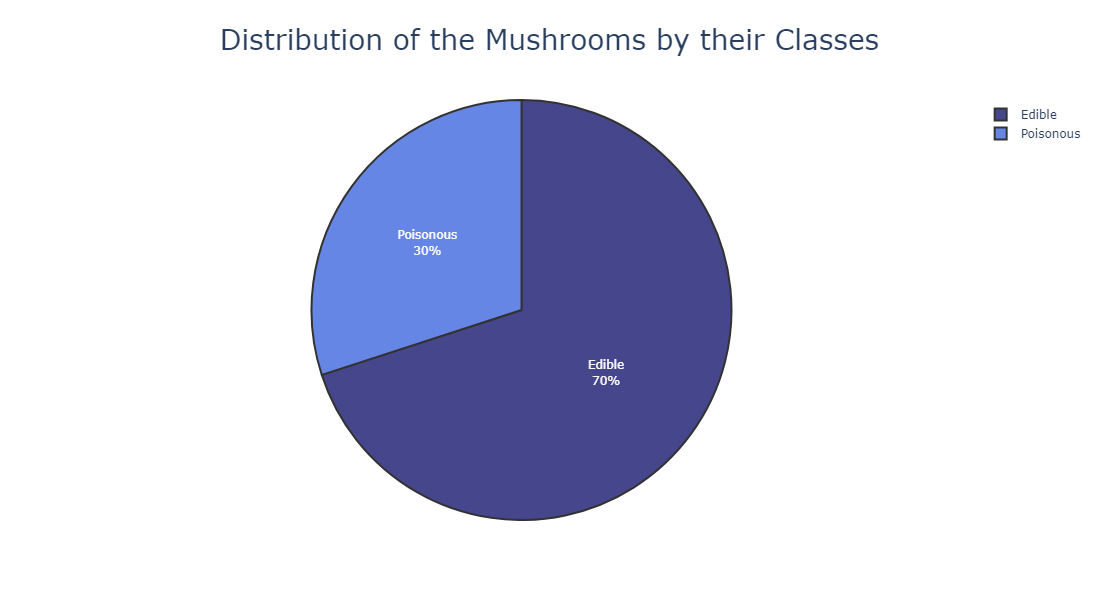

In [147]:
# Ensure the 'class' column exists
if 'class' in df.columns:
    # Calculate the frequency values for the pie chart
    class_counts = df['class'].value_counts()

    labels = ['Edible', 'Poisonous']
    values = [class_counts.get(0, 0), class_counts.get(1, 0)]  # Adjust according to your class encoding
    colors = ['#191970', '#4169E1']

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
    fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
    fig.update_layout(
        title_text='Distribution of the Mushrooms by their Classes',
        title_x=0.5,
        title_font=dict(size=28),
        autosize=False,
        width=800,
        height=600
    )
    fig.show()
else:
    print("The 'class' column is not found in the dataframe.")

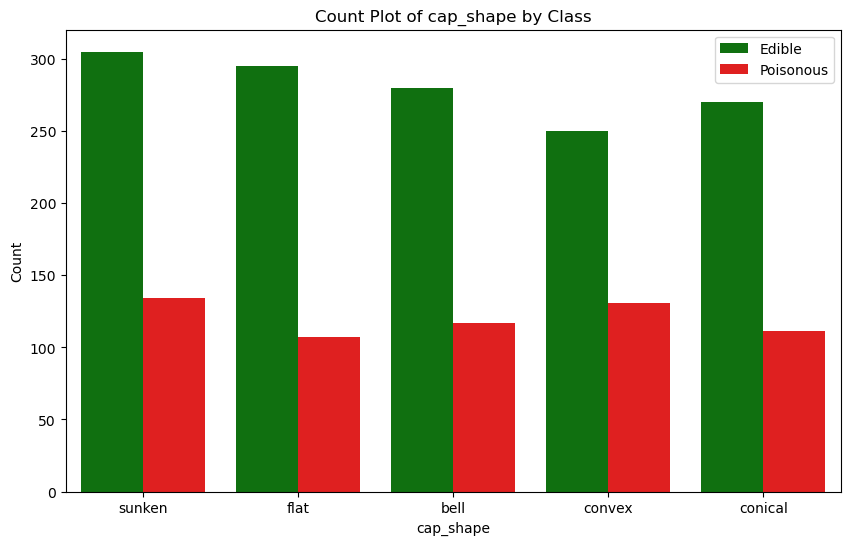

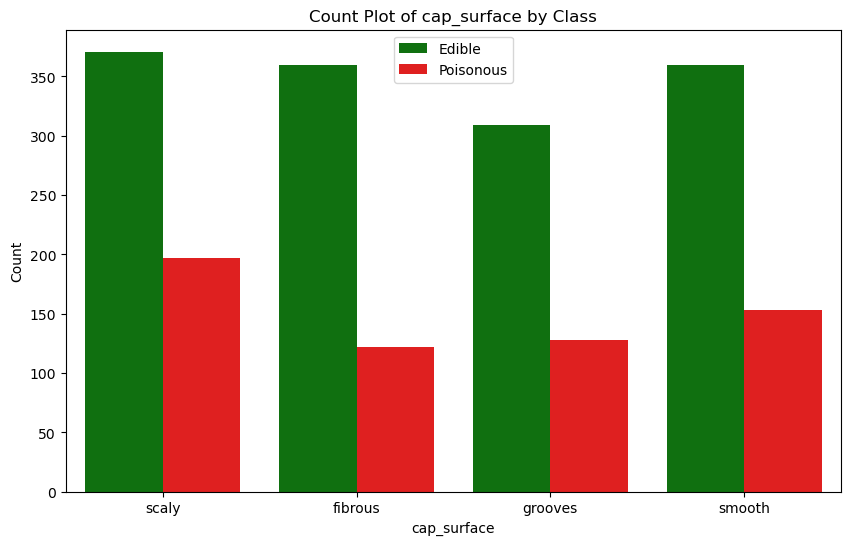

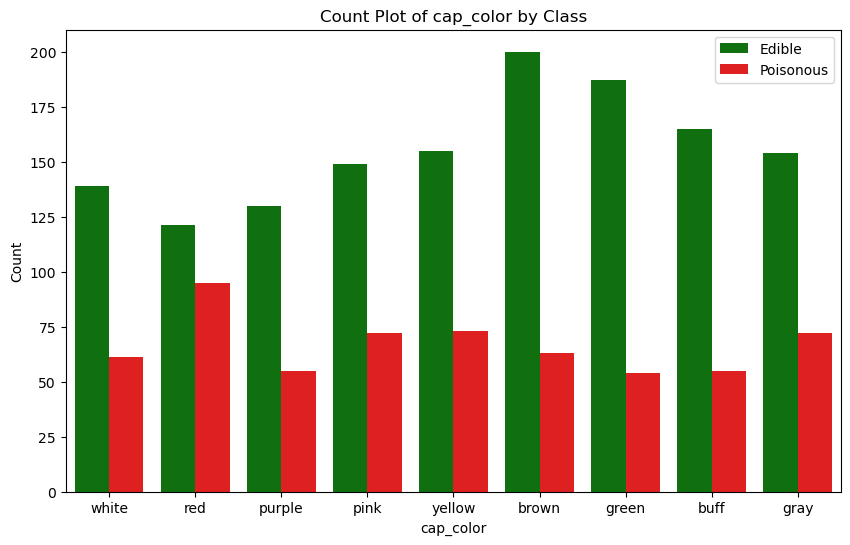

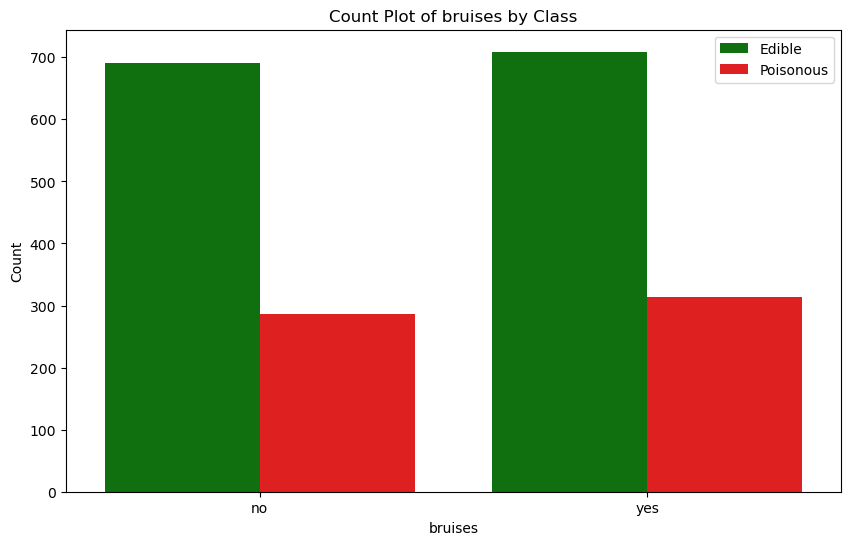

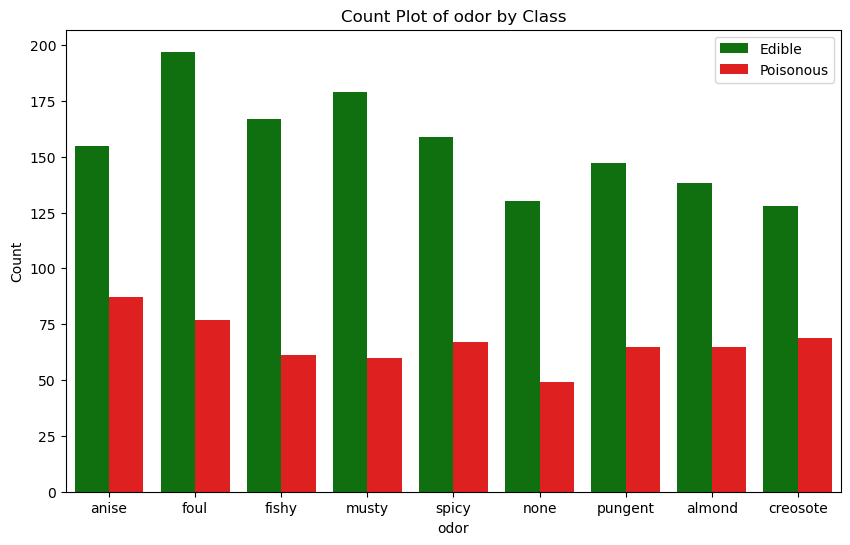

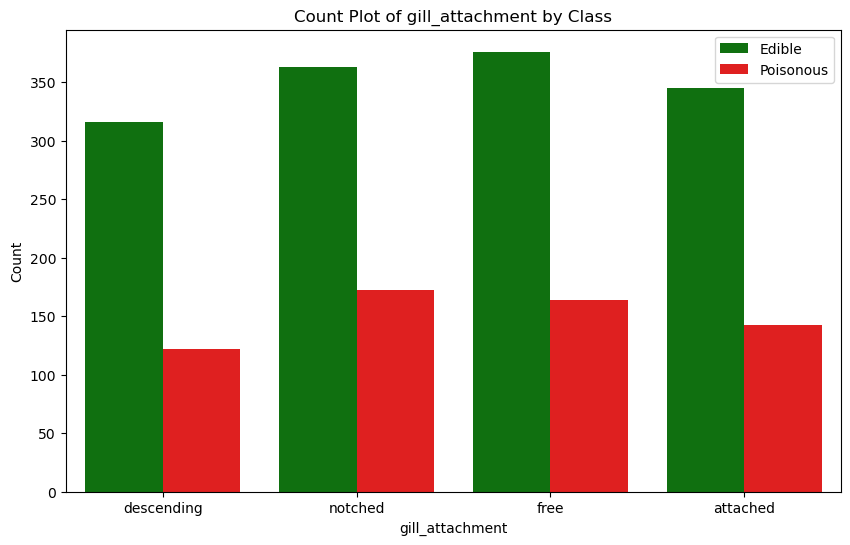

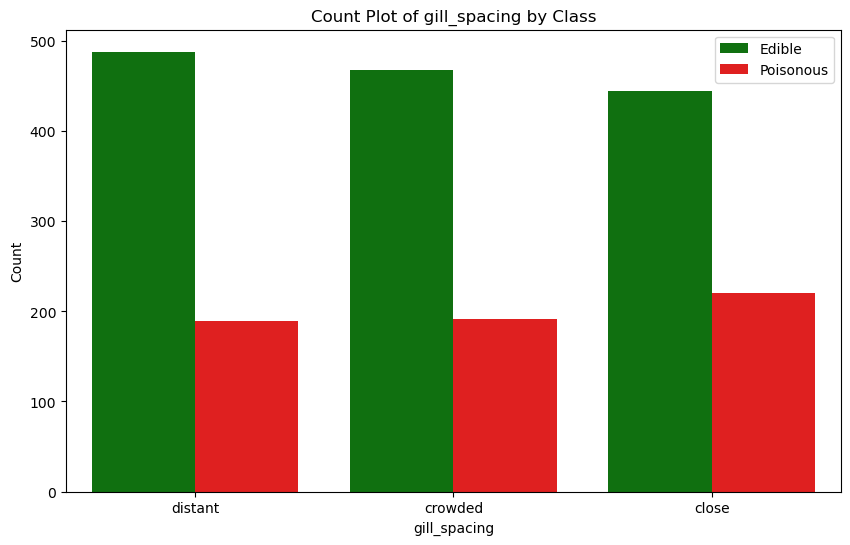

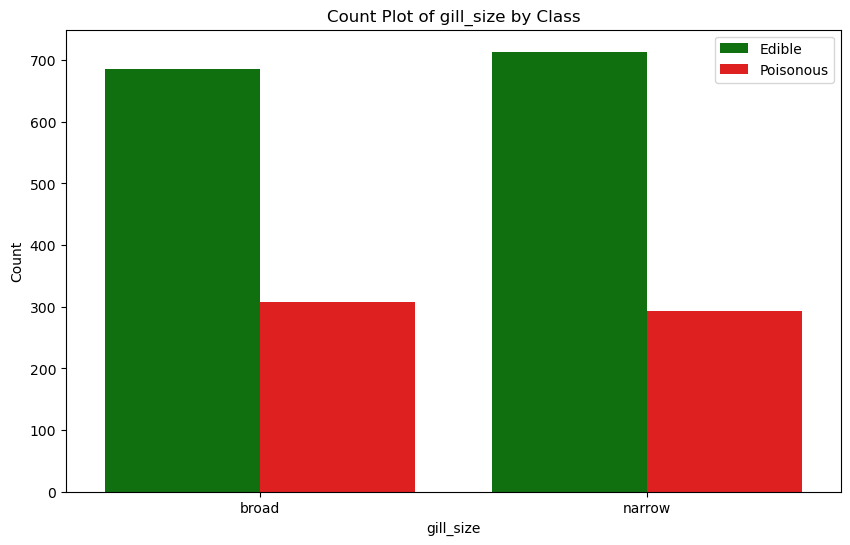

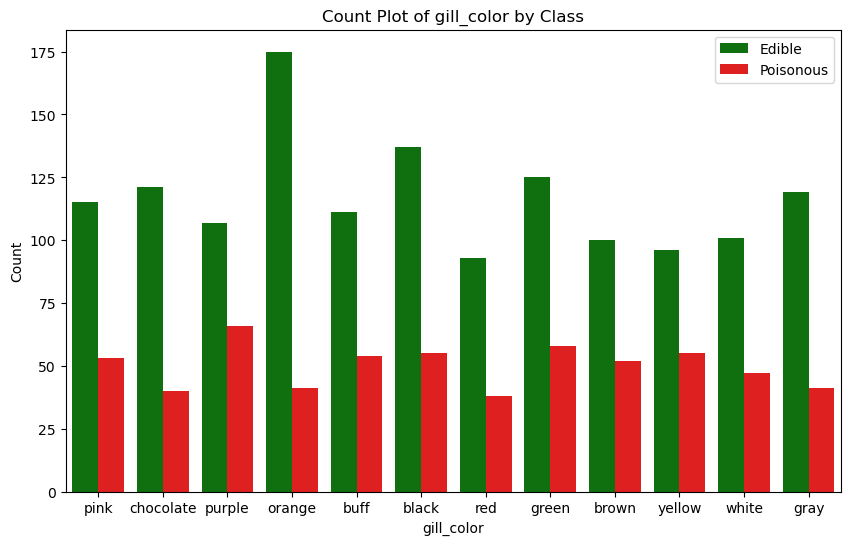

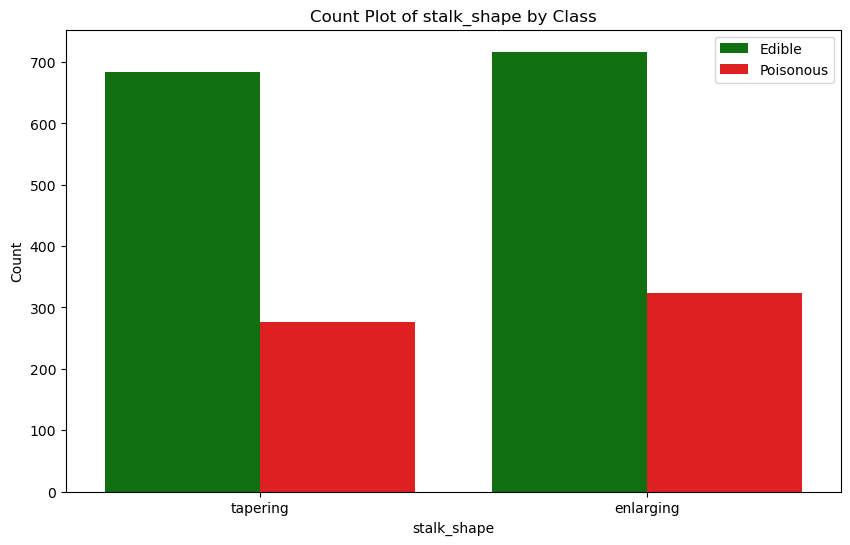

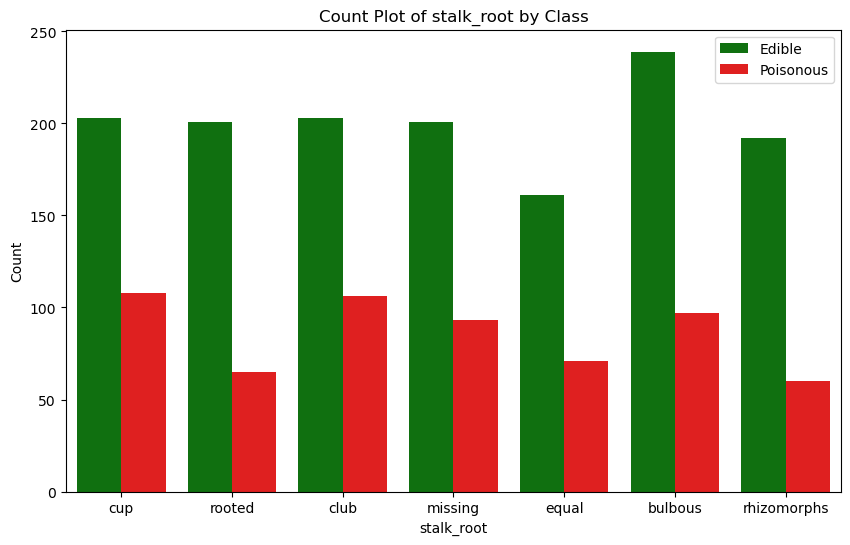

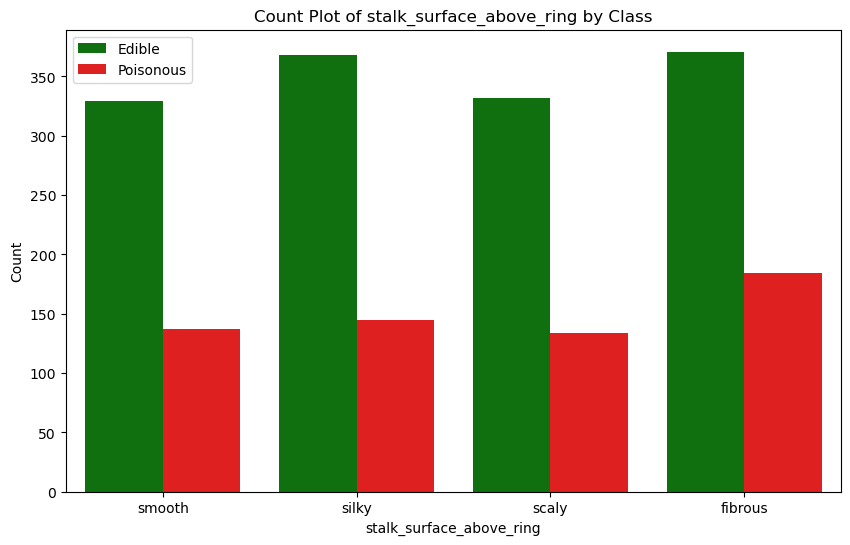

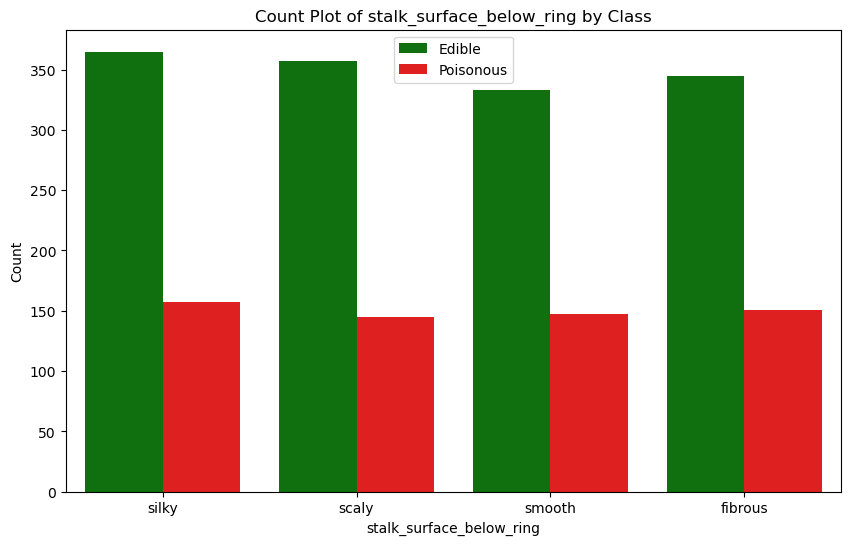

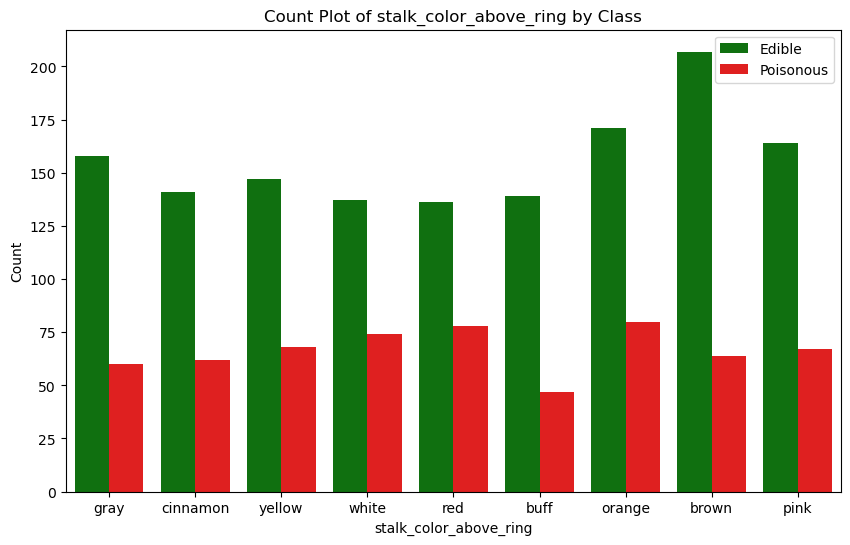

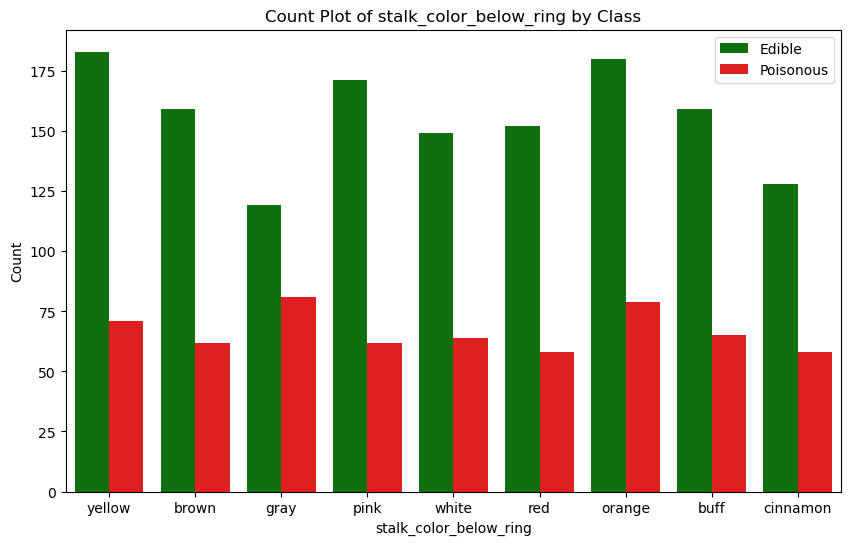

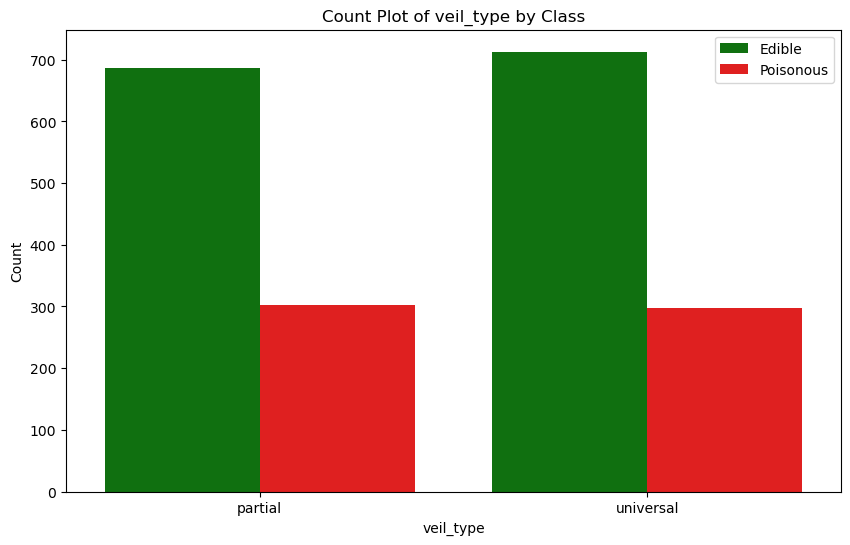

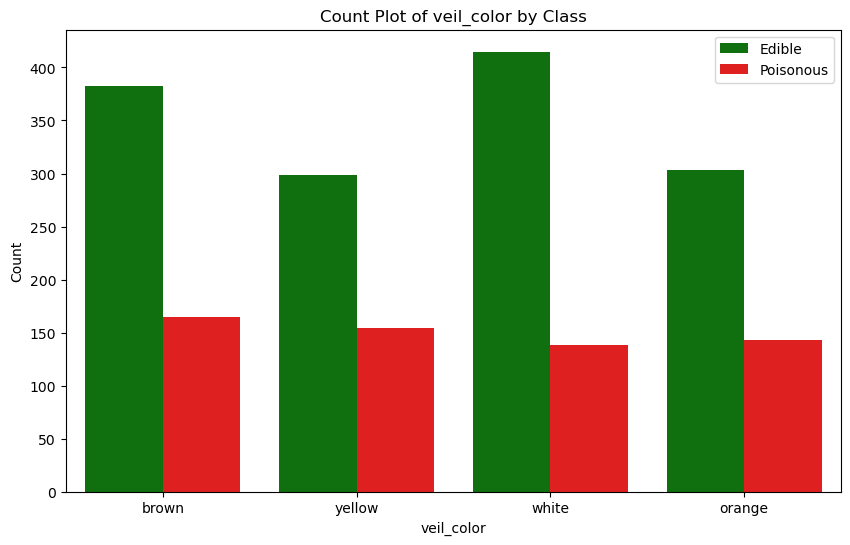

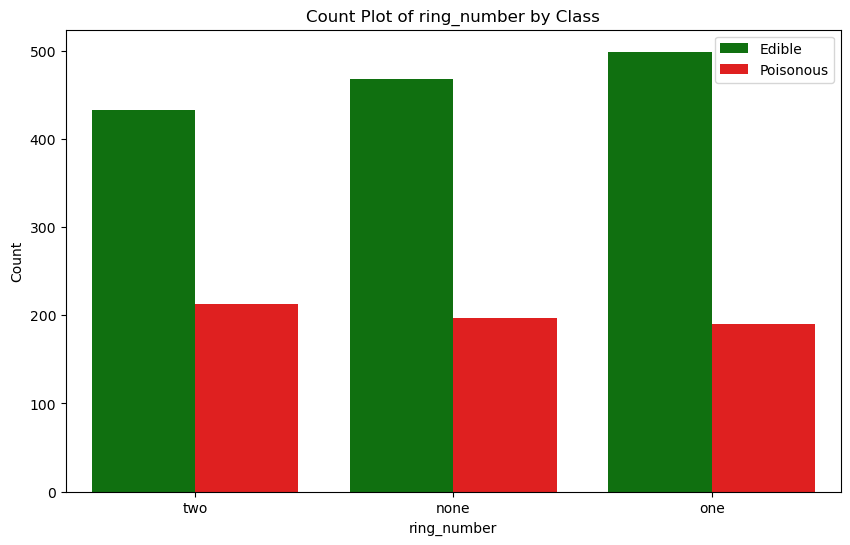

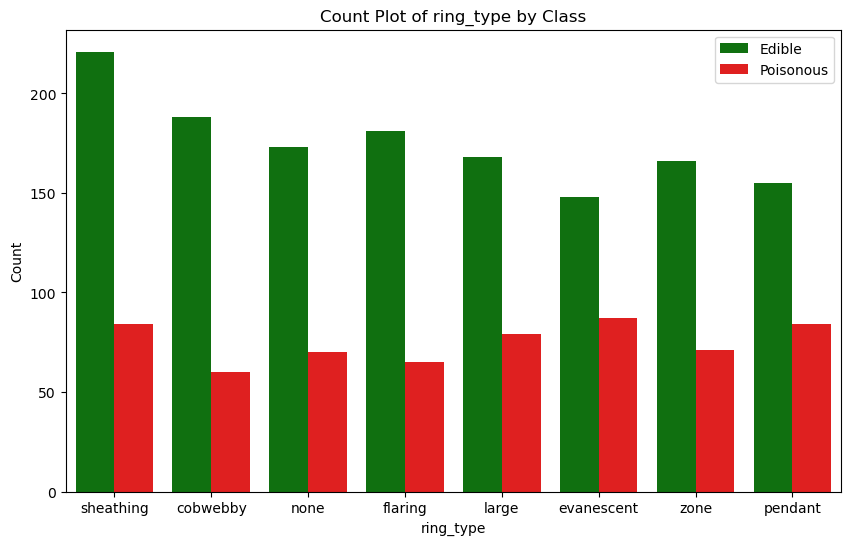

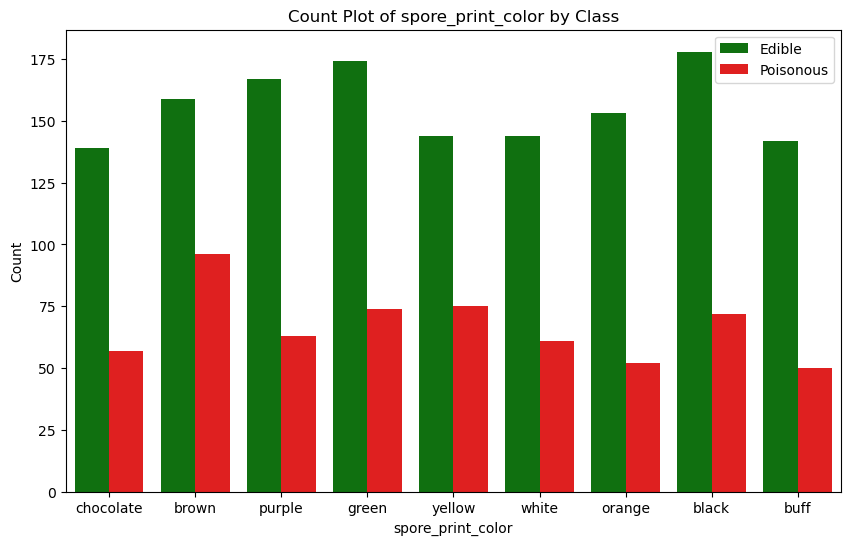

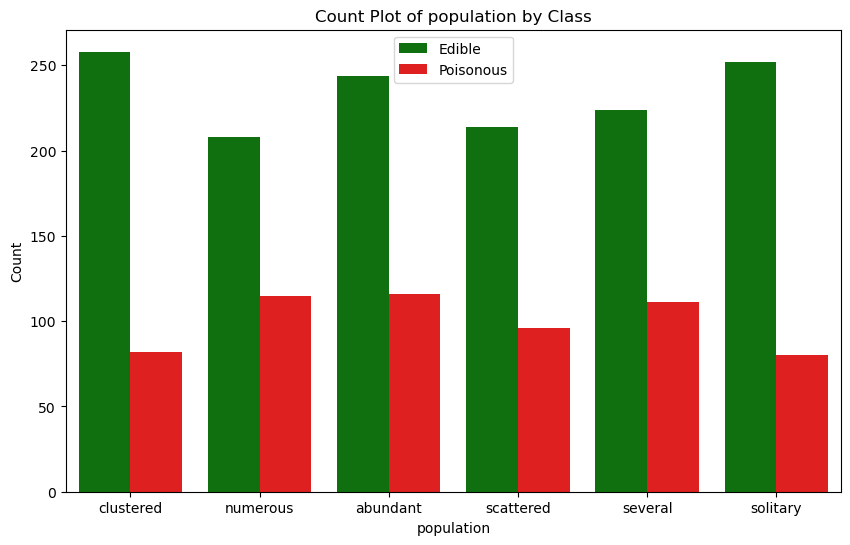

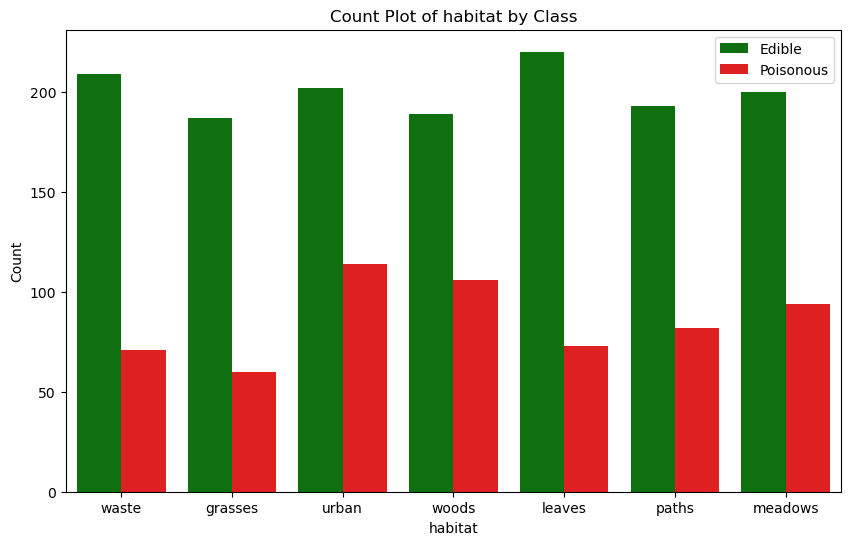

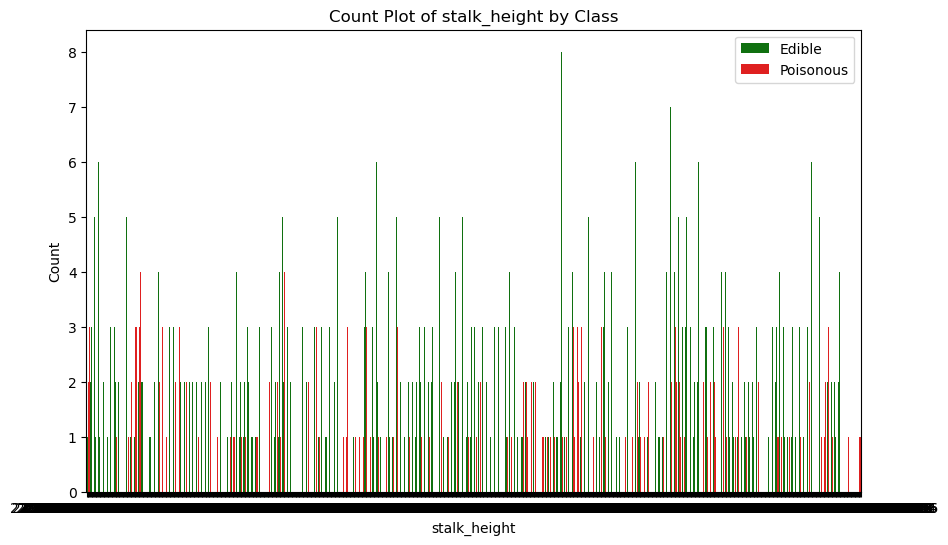

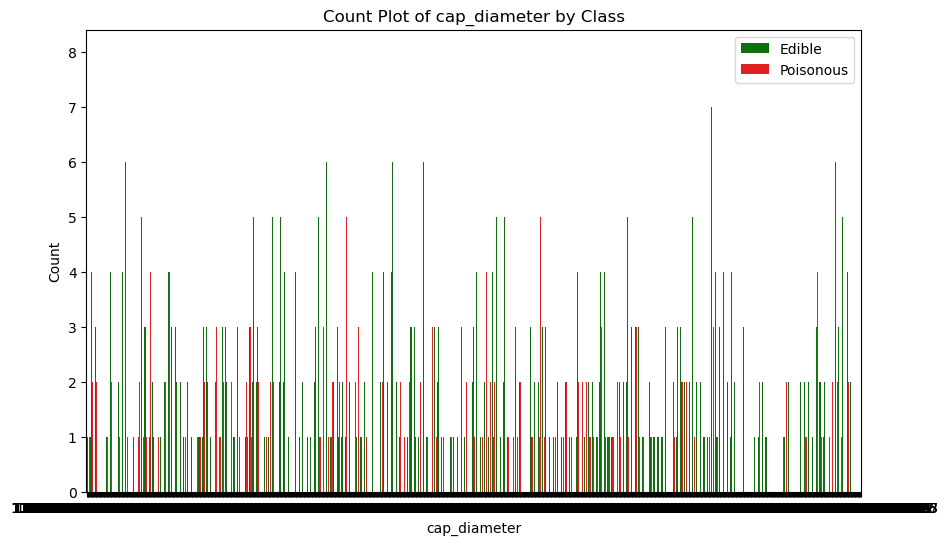

In [148]:
# This script generates count plots for each feature in the mushroom dataset, grouped by the 'class' column (Edible or Poisonous).
if 'class' in df.columns:
    columns = df.columns.tolist()
    columns.remove('class')  # Exclude the class column from the loop

    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, hue='class', palette=['green', 'red'])
        plt.title(f'Count Plot of {column} by Class')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(['Edible', 'Poisonous'])
        plt.show()
else:
    print("The 'class' column is not found in the dataframe.")

In [149]:
# Encode the categorical features and target variable
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [150]:
df.head(20)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,2,3,2,3,8,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,6,2,2,2,0,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,2,1,2,8,3,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,1,3,1,8,5,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,4,0,1,3,7,1,2,0,4,8,1,4,1,14.037532,12.545245
5,2,1,4,0,8,0,1,0,6,0,1,3,3,7,8,1,2,1,6,7,3,6,1,4.337043,16.189338
6,0,3,0,0,1,2,2,0,2,1,4,1,3,6,6,0,2,2,2,4,3,1,1,12.702359,24.662015
7,1,0,7,1,6,3,0,1,0,1,3,1,0,8,0,0,0,1,3,5,4,6,1,11.963690,19.408506
8,1,1,3,1,7,0,1,1,2,1,1,2,3,1,5,1,3,2,1,3,5,6,0,14.272490,13.260537
9,2,2,0,1,0,0,1,0,9,1,0,2,1,1,6,0,2,0,7,4,1,1,1,11.842597,4.216489


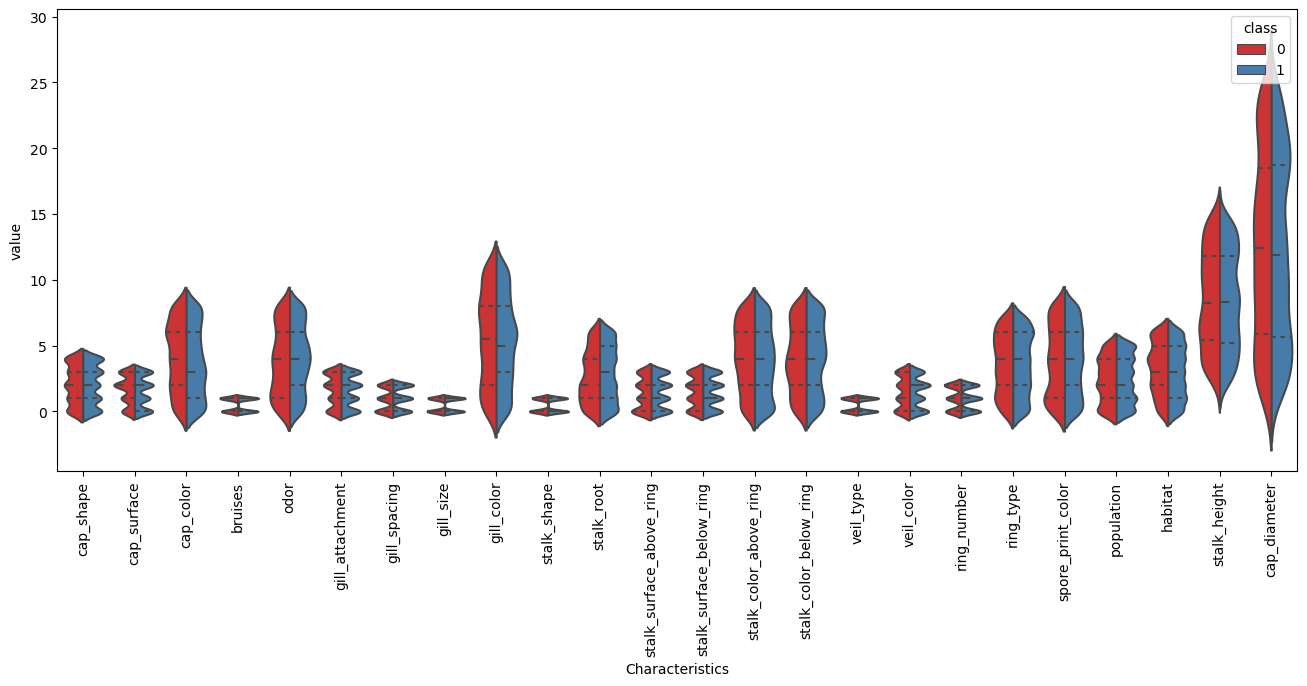

In [151]:
# Create violin plots to visualize the distribution of features split by the class variable
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

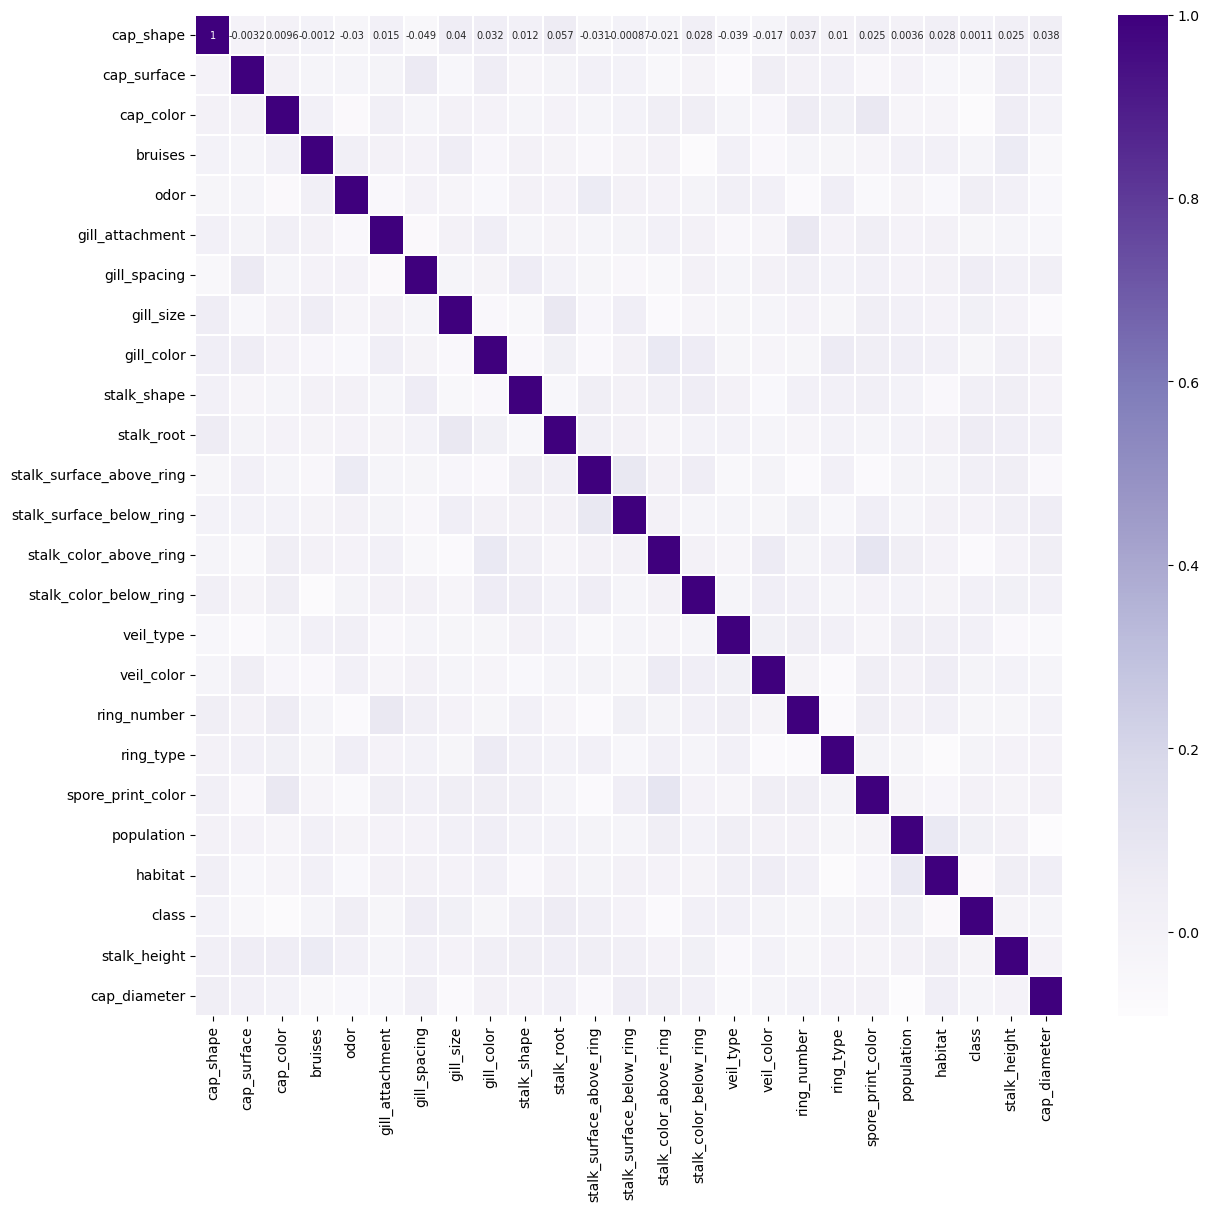

In [152]:
# Visualize the correlation matrix
plt.figure(figsize=(14,13))
sns.heatmap(df.corr(), linewidths=.1, cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.show()

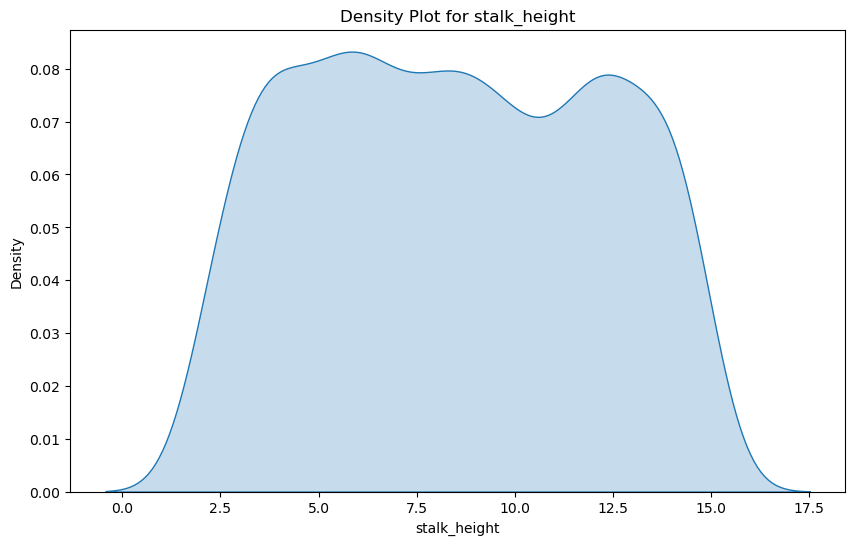

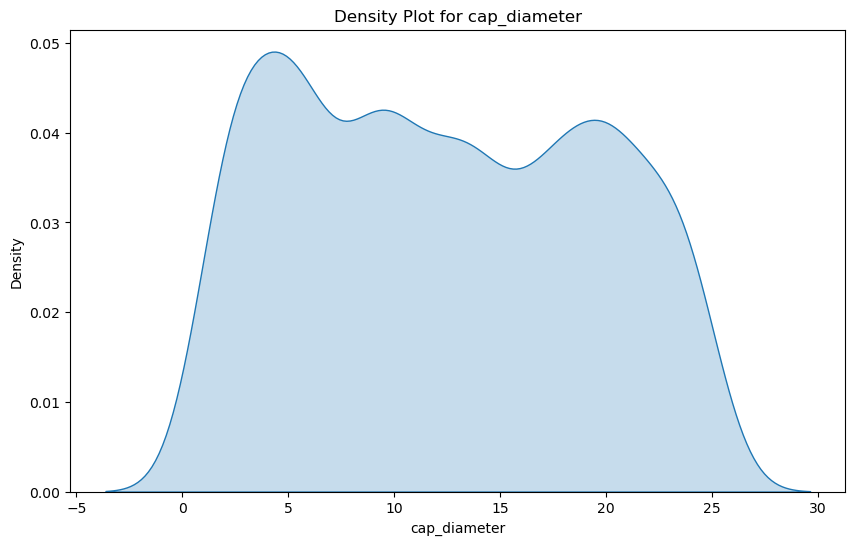

In [153]:
# Density plots for numerical features
numerical_features = ['stalk_height', 'cap_diameter']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Density Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [154]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [155]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Standardize the features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [157]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,2,3,2,3,8,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,6,2,2,2,0,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,2,1,2,8,3,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,1,3,1,8,5,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,4,0,1,3,7,1,2,0,4,8,1,4,1,14.037532,12.545245


In [158]:
# Train the SVM classifier on the PCA-transformed data
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [159]:
# Predict the test set results
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: \n{cm}")

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAccuracy score: {accuracy:.2f} %")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion matrix: 
[[ 49  84]
 [  4 263]]

Accuracy score: 78.00 %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.37      0.53       133
           1       0.76      0.99      0.86       267

    accuracy                           0.78       400
   macro avg       0.84      0.68      0.69       400
weighted avg       0.81      0.78      0.75       400



In [160]:
# Perform Grid Search to Compare SVM Performance with Various Kernels and Hyperparameters
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.50 %
Best Parameters: {'C': 0.75, 'gamma': 0.2, 'kernel': 'rbf'}


In [161]:
# Train the SVM classifier on the PCA-transformed data
classifier = SVC(C= 0.75, gamma= 0.2, kernel= 'rbf')
classifier.fit(X_train, y_train)

SVC(C=0.75, gamma=0.2)

In [162]:
# Predict the test set results with best metrics
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate and print the accuracy score
print(f"Confusion matrix: \n{cm}")
print(f"\nAccuracy score: {accuracy_score(y_test, y_pred) * 100}")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion matrix: 
[[ 87  46]
 [  0 267]]

Accuracy score: 88.5

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [163]:
# Compare SVM performance with various kernels 
# Define the parameters grid
parameters = [
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Perform Grid Search
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Print the results
print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.50 %
Best Parameters: {'C': 0.75, 'gamma': 0.2, 'kernel': 'rbf'}
